# Modelos de Regresón Lineal

## Modelo con datos simulados

Vamos a simular datos para las variables que permiten estimar y.

* _y = a + b * x_
* **x**: 100 valores distribuidos segun normal = 1,5 y desviacion estandar= 2,5
* **Ye** : 4 + 0.2 * x + e ---> y estimada
* **e** estara distribuida segun una normal 0 y desviacion estandar 0.8

In [67]:
import pandas as pd
import numpy as np

In [68]:
x = 1.5 + 2.5 * np.random.randn(100) #randn genera la normal de tamaño 100

In [69]:
res = 0 + 0.8 * np.random.randn(100) #es el error

In [70]:
y_pred = 5 + 1.9 * x #lo que nos devuelve el modelo lineal

In [71]:
y_act =  5 + 1.9 * x + res #los datos que observamos

In [72]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

Ahora vamos a crear el dataset

In [73]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion": y_pred_list
    }
)

In [74]:
data.head()

,x,y_actual,y_prediccion
0,-0.262366,3.806919,4.501505
1,2.881864,10.523341,10.475541
2,2.132301,9.242365,9.051372
3,3.366337,12.311142,11.396041
4,-0.022809,3.399735,4.956663


Vamos a realizar un plot del valor actual que somos capaces de medir y de la prediccion del mismo frente a la variable de entrada

In [75]:
import matplotlib.pyplot as plt

In [76]:
#voy a obtener el promedio de los valores actuales de y
y_mean = [np.mean(y_act) for i in range(1, len(x_list)+ 1)] #un vector que contiene el promedio,tantas veces como tenga x
# para luego mostrar linea de promedios para cada x

Text(0.5, 1.0, 'Valor actual vs prediccion')

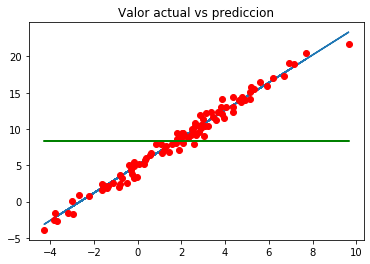

In [77]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor actual vs prediccion")

La linea azul es la prediccion y los rojos son los valores actuales o exactamente los valores de la muestra tomada. La prediccion esta muy cerca y estan bien conseguidos esos valores

![Valores regresion lineal](../Recursos/imgs/regresion_lineal.png)

* **SSD** : Suma de los cuadrados de las diferencias
* **SST** :  Suma de los cuadrados totales
* **SSR** : suma de los cuadrtados de regresion

Todos estos se marcan en diferente color en el grafico y se refeiren a la distancia entre cada uno de los diferentes parametros.
* promedio (linea verde)
* modelo regresion (linea azul)

_Vamos a calcular los anteriores parametrospara ver si nuestro modelo ha sido efectivo_

In [78]:
data["SSR"]=(data["y_prediccion"]-np.mean(y_act))**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-np.mean(y_act))**2

In [79]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,-0.262366,3.806919,4.501505,15.306536,0.482449,21.223920
1,2.881864,10.523341,10.475541,4.250521,0.002285,4.449903
2,2.132301,9.242365,9.051372,0.406419,0.036478,0.686418
3,3.366337,12.311142,11.396041,8.893391,0.837411,15.188797
4,-0.022809,3.399735,4.956663,11.952223,2.424024,25.141462


In [80]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [81]:
SSR

2780.678071752746

In [82]:
SSD

58.526585414298225

In [83]:
SST

2925.496041083755

In [84]:
SSR+SSD

2839.204657167044

In [85]:
R2 = SSR/SST

In [86]:
R2

0.9504979780190163

(array([ 2.,  4., 13., 16., 18., 19., 13.,  7.,  4.,  4.]),
 array([-1.79204348, -1.42121262, -1.05038176, -0.6795509 , -0.30872004,
         0.06211082,  0.43294168,  0.80377254,  1.1746034 ,  1.54543426,
         1.91626512]),
 <a list of 10 Patch objects>)

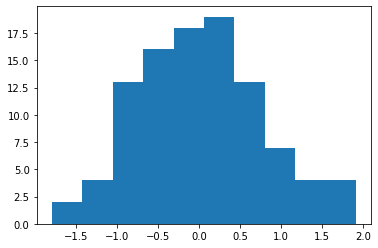

In [87]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo recta de regresion
* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [90]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.8200915239680922, 8.413861695018237)

In [94]:
#primero el numerador
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean) #data x es un array  de varios valores

#luego el denomionador
data["beta_d"] = (data["x"]-x_mean)**2

In [95]:
#Unimos y obtenemos el valor final de beta
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [96]:
alpha = y_mean - beta * x_mean

In [97]:
alpha, beta

(4.901781909041488, 1.9296171317362387)

El modelo lineal obtenido por regresion es:
**y = 4.90 +1.93 * x** _se aproximaron los valores obtenidos_

In [98]:
#añadimos una columna adicional al dataset con el modelo
data["y_model"] = alpha + beta * data["x"]

In [99]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,-0.262366,3.806919,4.501505,15.306536,0.482449,21.223920,9.593761,4.336629,4.395516
1,2.881864,10.523341,10.475541,4.250521,0.002285,4.449903,2.239786,1.127360,10.462675
2,2.132301,9.242365,9.051372,0.406419,0.036478,0.686418,0.258667,0.097475,9.016306
3,3.366337,12.311142,11.396041,8.893391,0.837411,15.188797,6.026153,2.390876,11.397524
4,-0.022809,3.399735,4.956663,11.952223,2.424024,25.141462,9.240536,3.396282,4.857769


In [100]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [101]:
SSR, SSD, SST

(2867.841427084657, 57.65461399910075, 2925.496041083755)

In [102]:
R2 = SSR / SST
R2

0.9802923630080389

Text(0.5, 1.0, 'Valor Actual vs Predicción')

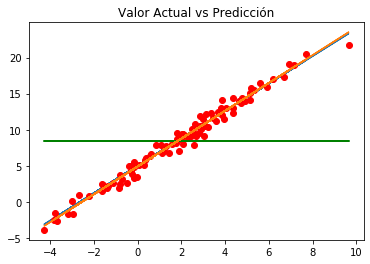

In [103]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

#### **NOTA:**
Revisa el notebook original para conocer **los cambios realizados con valores diferentes de "b" en el modelo** que dieron una gran dispersion y lineas paralelas en el grafico:
https://github.com/joanby/python-ml-course/blob/master/notebooks/T4%20-%201%20-%20Linear%20Regression%20-%20Datos%20ficticios.ipynb